In [16]:
import numpy as np

import statsmodels.api as sm

import statsmodels.formula.api as smf

import pandas as pd
import plotnine as p9

In [48]:
exercise=pd.read_csv("exercise.csv")
exercise=exercise[0:40]

In [23]:
exercise

,y,x1,x2
0,15.68,6.87,14.09
1,6.18,4.40,4.35
2,18.10,0.43,18.09
3,9.07,2.73,8.65
4,17.97,3.25,17.68
5,10.04,5.30,8.53
6,20.74,7.08,19.50
7,9.76,9.73,0.72
8,8.23,4.51,6.88
9,6.52,6.40,1.26


In [24]:
results = smf.ols('y ~ x1 + x2', data=exercise).fit()
wyn=results.params

In [25]:
results.summary()
#Wnioski:
# - zmienna Adj. R-squared wynosi 0.971 co mówi o dobrym dopasowaniu modelu

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     652.4
Date:                Thu, 12 Dec 2019   Prob (F-statistic):           1.41e-29
Time:                        20:17:22   Log-Likelihood:                -50.985
No. Observations:                  40   AIC:                             108.0
Df Residuals:                      37   BIC:                             113.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3151      0.388      3.392      0.002       0.530       2.101
x1             0.5148      0.046     11.216      0.000       0.422       0.608
x2             0.8069      0.024     33.148      0.000       0.758       0.856
==============================================================================
Omnibus:                       14.478   Durbin-Watson:                   2.509
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.393
Skew:                           1.341   Prob(JB):                     0.000454
Kurtosis:                       4.428   Cond. No.                         38.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

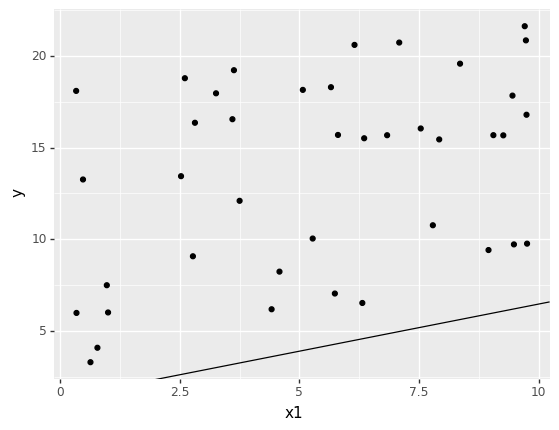

<ggplot: (-9223371930591440532)>

In [26]:
#Wyświetlenie modelu graficznie
fig1=(p9.ggplot(p9.aes(x='x1',y='y'),data=exercise)
      +p9.geom_jitter(width=0.1)
      +p9.geom_abline(p9.aes(intercept=wyn['Intercept'],slope=wyn['x1'])))
fig1

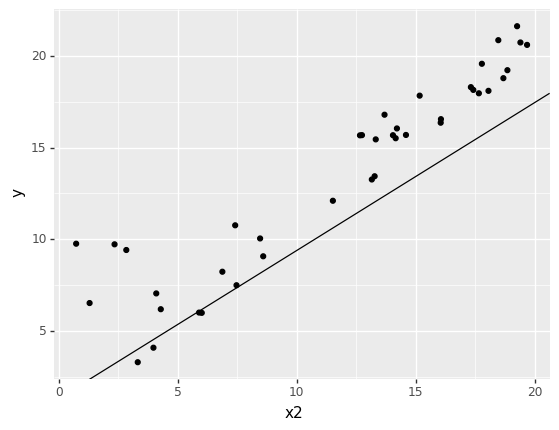

<ggplot: (-9223371930591525512)>

In [27]:
fig2=(p9.ggplot(p9.aes(x='x2',y='y'),data=exercise)
      +p9.geom_jitter(width=0.1)
      +p9.geom_abline(p9.aes(intercept=wyn['Intercept'],slope=wyn['x2'])))
fig2

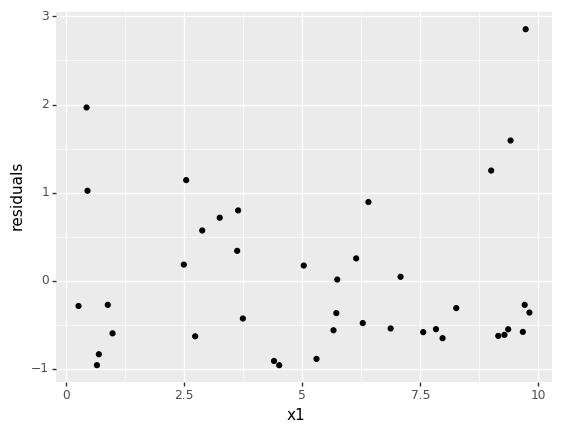

<ggplot: (-9223371930591491704)>

In [28]:
#Wyświetlenie wykresów residuów modelu
df=exercise
df['y_pred']=results.predict()
df['residuals']=df['y']-df['y_pred']
fig1_res=(p9.ggplot(p9.aes(x='x1',y='residuals'),data=exercise)
      +p9.geom_point())
fig1_res

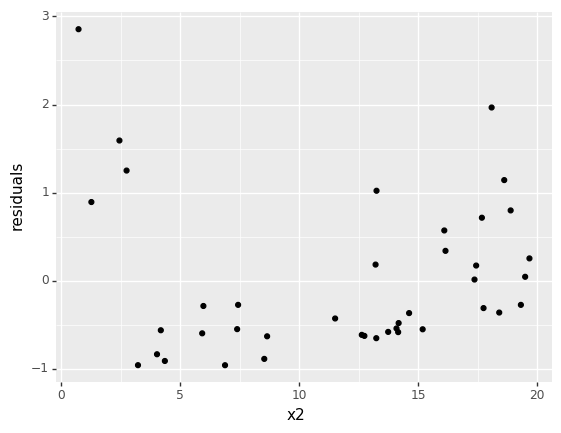

<ggplot: (-9223371876347154040)>

In [12]:
fig2_res=(p9.ggplot(p9.aes(x='x2',y='residuals'),data=exercise)
      +p9.geom_point())
fig2_res
#wikszość mieści się od -1 do 1 co można uznać za wystarczające

In [37]:
exercise_pred=pd.read_csv("exercise.csv")
results_pred = smf.ols('y ~ x1 + x2', data=exercise_pred).fit()
x1_x2 = exercise_pred[40:60].drop('y',axis = 1)
y_pred = results_pred.predict(x1_x2)
x1_x2["y"] = y_pred
x1_x2

,x1,x2,y
40,9.87,10.43,14.812484
41,9.99,15.72,19.142865
42,8.39,0.35,5.916816
43,0.80,10.91,10.530475
44,9.58,15.82,19.012485
45,4.82,11.90,13.398863
46,2.97,2.46,4.829144
47,8.80,4.09,9.145767
48,6.07,1.80,5.892489
49,0.19,13.54,12.338639
